# Simple Neural Network

Import libraries:
 - *numpy* to work with arrays and matrices
 - *matplotlib* to visualize data
 - *expit* to filter values which causes error 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

Imagine we have data which we can divide by two classes.

In [22]:
p1 = [3, 8] # spawn for blue
p2 = [10, 2] # spawn for orange

train = 60
tests = 20

data = np.concatenate(
    (
        [np.insert(p1 + np.random.normal(0, 1, 2), 2, 1) for _ in range(train // 2 + tests // 2)], 
        [np.insert(p2 + np.random.normal(0, 1, 2), 2, 0) for _ in range(train // 2+ tests // 2)]
    ), axis=0)
np.random.shuffle(data)

x = np.mat(data[:,[0, 1]][0:train])
y = np.mat(data[:,2][0:train]).T

x_test = np.mat(data[:,[0, 1]][train:])
y_test = np.mat(data[:,2][train:]).T

Example schema of neuron.
```
x1 ——┐
     | w1
     ├——————> d = w0 + w1x1 + w2x2 = sigmoid( Y )
     | w2
x2 ——|
     |
w0 ——┘
```
It's a neuron with 2 inputs and 1 output noted as `[2, 1]`.

Additional functions.

In [23]:
def design_matrix(x):
    return np.mat(np.insert(x, 0, 1, axis=1))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Neuron class with few methods to update parameters.

In [25]:
class Neuron:
    x = None # inputs
    y = None # actual output
    x_test = None
    y_test = None
    w = None # weights
    
    activation_func = None
    learning_rate = None
    epoches = None
    
    def __init__(self, x, y, x_test=None, y_test=None, learning_rate=0.01, epoches=100_000, activation_func='sigmoid'):
        self.x = x
        self.y = y
        self.x_test = x_test
        self.y_test = y_test
        self.epoches = epoches
        self.learning_rate = learning_rate
        
        self.w = np.mat(np.zeros(self.x.shape[1] + 1)) # initialize weights
        if activation_func == 'sigmoid':
            self.activation_func = sigmoid
        
    def predict(self):
        return self.activation_func(design_matrix(self.x) * self.w.T)
    
    def train(self):
        for i in range(self.epoches):
            y_ = self.predict()
            dw = np.dot(design_matrix(self.x).T, y_ - self.y)
            dw /= self.x.shape[0]
            dw *= self.learning_rate
            self.w -= dw.T
            
    def loss(self):
        h = expit(self.predict())
        return (-self.y.T @ np.log(h) - (1 - self.y).T @ np.log(1 - h)).mean() 

    def plot_model(self):
        plt.scatter([*self.x[:,0].flat], [*self.x[:,1].flat], c=['tab:orange' if x == 1 else 'tab:blue' for x in self.y.flat])
        plt.scatter([*self.x_test[:,0].flat], [*self.x_test[:,1].flat], c=['red' if x == 1 else 'blue' for x in self.y_test.flat])
        
        x_ = np.arange(-2, 14, 1)
        y_ = -(self.w[0, 0] + x_ * self.w[0, 1]) / self.w[0, 2]
        plt.plot(x_, y_, c='red')
        
        plt.xlabel('x1')
        plt.ylabel('x2')
        
        plt.show()

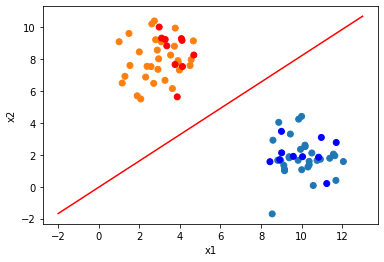

Wall time: 319 ms


(matrix([[ 0.07557571, -1.75336733,  2.1301986 ]]), 30.193902379468668)

In [36]:
%%time
neuron = Neuron(x, y, x_test, y_test, 1, 1000)
neuron.train()
neuron.plot_model()

neuron.w, neuron.loss()